## **Iris dataset**

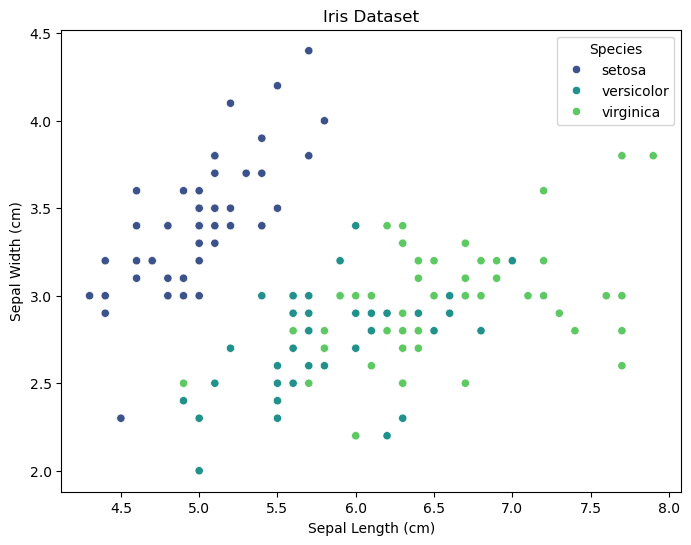

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
np.random.seed(2025)
iris = load_iris()
x, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(x, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris['label'].apply(lambda x: features_dict[x])


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_iris["sepal length (cm)"],
    y=df_iris["sepal width (cm)"],
    hue=df_iris["label_names"],
    palette="viridis",
    alpha=1
)

plt.title("Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2025)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, len(X_train_scaled))  
all_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train) 
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    all_acc.append(acc)

print(all_acc)
k_best = k_values[all_acc.index(max(all_acc))]
score_best = max(all_acc)
print ('The best k = {}, score = {}'.format(k_best, round(score_best,4)))




[0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9210526315789473, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632,

## **Synthetic dataset**

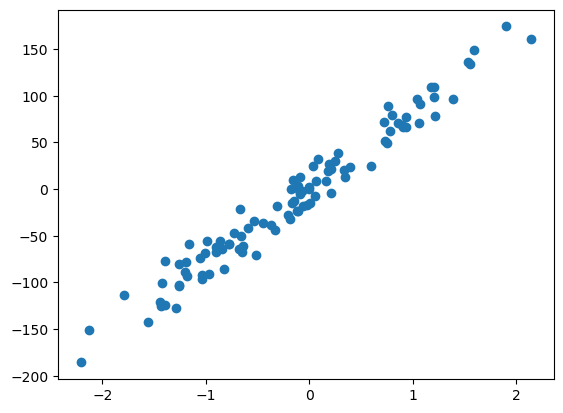

In [60]:
np.random.seed(2025)
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(
    n_samples = 100,
    n_features=1,
    n_informative=1,
    bias = 0,
    noise = 15,
    random_state=2025) 
plt.figure()
plt.scatter(X_R1, y_R1)
plt.show()
X_R1_train, X_R1_test, y_R1_train, y_R1_test = train_test_split(X_R1, y_R1, random_state=2025)
X_R1_train_scaled = scaler.fit_transform(X_R1_train)
X_R1_test_scaled = scaler.transform(X_R1_test)


[0.8869221496279123, 0.9242883617608262, 0.9282663213557231, 0.9283341663987152, 0.9394442330637984, 0.9458734032211005, 0.9407434167345485, 0.9388574744000022, 0.9404532295597875, 0.9388083538160005, 0.9483385762111786, 0.9458547631880949, 0.9474862904058554, 0.9482072257547465, 0.9431075828880798, 0.9381017274159879, 0.9329647719446554, 0.9321576424687243, 0.9339041718522945, 0.929916406339761, 0.9242729218734345, 0.917292858556954, 0.9161357267154069, 0.9084064586389414, 0.9056206356922932, 0.8965210057393426, 0.8864099888538746, 0.8830242647044287, 0.8775448446734028]
The best k = 11 , score = 0.9483


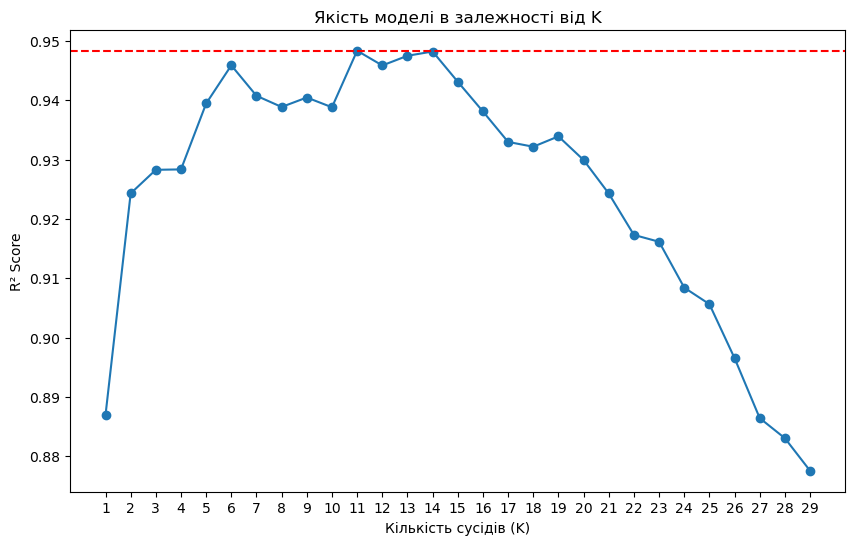

In [61]:
from sklearn.neighbors import KNeighborsRegressor
k_2_values = range(1, 30)
scores = []

for k in k_2_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_R1_train_scaled, y_R1_train)
    score = knn.score(X_R1_test_scaled, y_R1_test)
    scores.append(score)


best_k = k_2_values[scores.index(max(scores))]
score_best = round(max(scores),4)
print(scores)
print ('The best k = {} , score = {}'.format(best_k,score_best ))

plt.figure(figsize=(10, 6))
plt.plot(k_2_values, scores, marker='o')
max_score = max(scores)
plt.axhline(y=max_score, color='r', linestyle='--' )
plt.xlabel('Кількість сусідів (K)')
plt.ylabel('R² Score')
plt.xticks(range(1,30))
plt.title('Якість моделі в залежності від K')
plt.show()


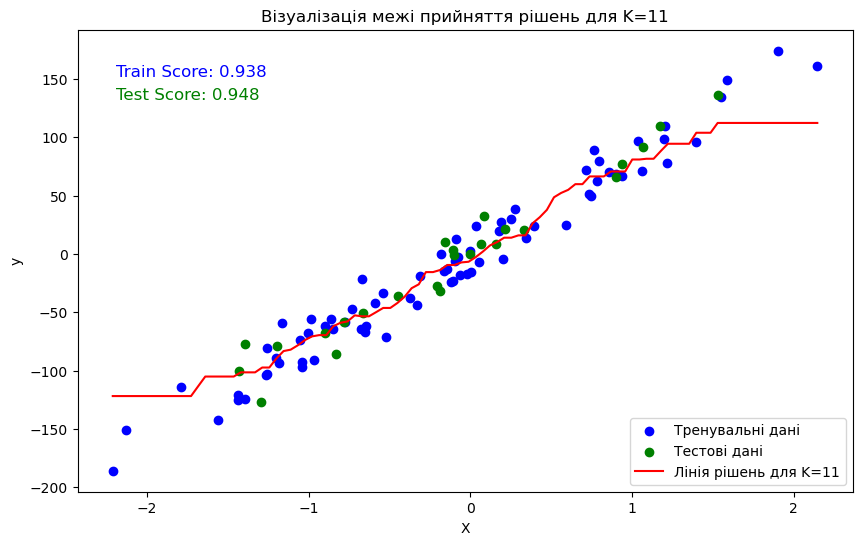

In [62]:
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_R1_train_scaled, y_R1_train)

x_range = np.linspace(X_R1.min(), X_R1.max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_pred_range = knn_best.predict(x_range_scaled)
train_score = knn_best.score(X_R1_train_scaled, y_R1_train)
test_score = knn_best.score(X_R1_test_scaled, y_R1_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_R1_train, y_R1_train, color='blue', label='Тренувальні дані')
plt.scatter(X_R1_test, y_R1_test, color='green', label='Тестові дані')
plt.plot(x_range, y_pred_range, color='red', label=f'Лінія рішень для K={best_k}')

plt.text(0.05, 0.9, f'Train Score: {train_score:.3f}', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.text(0.05, 0.85, f'Test Score: {test_score:.3f}', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Візуалізація межі прийняття рішень для K={best_k}')
plt.legend()
plt.show()